Notebook to implement population model gradient descent to learn parametesr such as p_sympt, p_severe, p_hosp

In [1]:
import datetime
import turicreate as tc
import matplotlib.pyplot as plt
covidestim_csv = 'covidestim.csv'
estimates = tc.SFrame(covidestim_csv)
print(estimates['state'].unique())
state_long = 'California'
state_short = 'CA' 

%load_ext autoreload
%autoreload 2
from PopulationData_ag import PopulationData
from HospitalData_v20210203 import HospitalData
# import random
import autograd

training_mid_dates = [20200901,  20201120] # start mid end, where forecasting happens from mid to end
# training_mid_dates = [20201010,  20201120] # start mid end, where forecasting happens from mid to end
forecast_duration = 80
training_end_dates = [int((datetime.datetime.strptime(str(d),'%Y%m%d') 
                       + datetime.timedelta(days = forecast_duration)).strftime('%Y%m%d')) for d in training_mid_dates]


# print(training_end_dates)
def make_forecastable_csv(date):
    pd_dummy = PopulationData(covidestim_csv, state_long,'20200711', date, forecast=False);
    pd_dummy.filtered_data.save(state_short+ '_forecast_after_' + str(date) + '.csv', format='csv') 

hd_truthful = HospitalData('CT_HHS_data.csv', state_short,'20200711','20210305')
pd_truthful = PopulationData(covidestim_csv, state_long,'20200711', '20210305', forecast=False);
# pd_truthful.filtered_data['date'].unique().sort()[-10:-1]

for d in training_mid_dates:
    make_forecastable_csv(d)

pd_list = []
for i,(m,e) in enumerate(zip(training_mid_dates,training_end_dates)):
    pd_list += [PopulationData(state_short+ '_forecast_after_'+str(m) + '.csv',state_long,'20200711',str(e), training_mode=True, debug_mode=True)]



pd_list_train = pd_list[0:-1]
pd_list_val = pd_list[-1:]

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.813064 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.707901 secs.

['Missouri', 'District of Columbia', 'Oregon', 'New Hampshire', 'Florida', 'Georgia', 'Mississippi', 'Kansas', 'South Dakota', 'Delaware', 'Hawaii', 'Rhode Island', 'Wisconsin', 'Tennessee', 'New Jersey', 'Utah', 'Colorado', 'New Mexico', 'New York', 'Puerto Rico', 'Louisiana', 'Michigan', 'Vermont', 'Arkansas', 'Nebraska', 'Oklahoma', 'West Virginia', 'Maine', 'Alaska', 'Nevada', 'North Carolina', 'California', 'Indiana', 'Ohio', 'Texas', 'Idaho', 'Washington', 'Arizona', 'Minnesota', 'Iowa', 'Illinois', 'Kentucky', 'South Carolina', 'Montana', 'Massachusetts', 'Virginia', 'Pennsylvania', 'Wyoming', 'Connecticut', 'Alabama', 'Maryland', 'North Dakota']


Read 100 lines. Lines per second: 292.961

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CT_HHS_data.csv

Parsing completed. Parsed 100 lines in 0.341616 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,int,str,int,str,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CT_HHS_data.csv

Parsing completed. Parsed 21004 lines in 0.093748 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.674591 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.734 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.698858 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.785369 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.660094 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.654659 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CA_forecast_after_20200901.csv

Parsing completed. Parsed 53 lines in 0.090508 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CA_forecast_after_20200901.csv

Parsing completed. Parsed 53 lines in 0.052299 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.79894 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.986453 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CA_forecast_after_20201120.csv

Parsing completed. Parsed 100 lines in 0.134234 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 133 lines. Lines per second: 7888.03

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CA_forecast_after_20201120.csv

Parsing completed. Parsed 133 lines in 0.016995 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.514269 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.623904 secs.

In [2]:
hd_truthful.filtered_data

previous_day_admission_adult_covid_confirmed ...,total_adult_patients_hospitalized_confirmed_covid ...,staffed_icu_adult_patients_confirmed_covid ...,previous_day_admission_adult_covid_confirmed_c ...,total_adult_patients_hospitalized_confirmed_co ...
None,182,None,0,17
None,264,None,0,32
None,187,None,0,17
None,3493,None,0,195
449,4835,1032,174,280
567,5014,1136,186,284
601,5112,1207,209,301
584,5035,1175,212,299
391,5152,1067,190,311
605,5182,1258,246,305


4138.607797989767 loss at iteration  0 *** gradients_cummsum =  0.00770648681510818


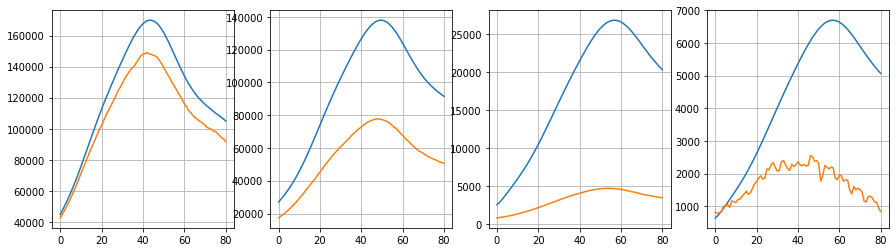

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.82, 'prob_severe': 0.2, 'prob_hosp': 0.25, 'prob_soujourn_inf_alpha': 3.41, 'prob_soujourn_inf_beta': 0.605, 'prob_soujourn_symp_alpha': 1.62, 'prob_soujourn_symp_beta': 0.218} 

3697.2382906695857 loss at iteration  1 *** gradients_cummsum =  0.007050483430611933
3329.878727512004 loss at iteration  2 *** gradients_cummsum =  0.006446525965196756
3024.750400601958 loss at iteration  3 *** gradients_cummsum =  0.005891260134017312
2771.814616774285 loss at iteration  4 *** gradients_cummsum =  0.005381478029597584
2562.5403542441954 loss at iteration  5 *** gradients_cummsum =  0.004914110331934698


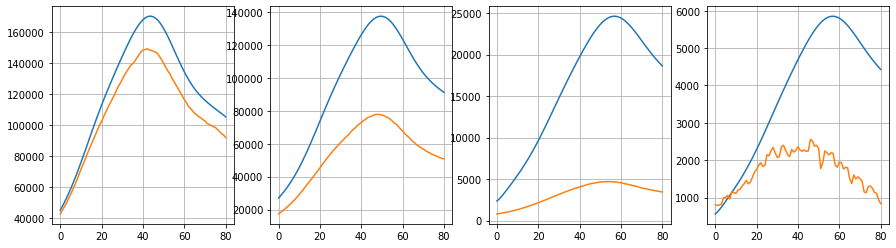

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8164393123080116, 'prob_severe': 0.18446780218642936, 'prob_hosp': 0.2377185157265959, 'prob_soujourn_inf_alpha': 3.409955643856485, 'prob_soujourn_inf_beta': 0.6052671389646751, 'prob_soujourn_symp_alpha': 1.6199104268234965, 'prob_soujourn_symp_beta': 0.21870079631087483} 

2389.699317448582 loss at iteration  6 *** gradients_cummsum =  0.004486221772768607
2247.185374716767 loss at iteration  7 *** gradients_cummsum =  0.0040950089037886635
2129.8558135681756 loss at iteration  8 *** gradients_cummsum =  0.0037377993439661954
2033.3921773900095 loss at iteration  9 *** gradients_cummsum =  0.0034120518161290065
1954.1786901150786 loss at iteration  10 *** gradients_cummsum =  0.003115356420294089


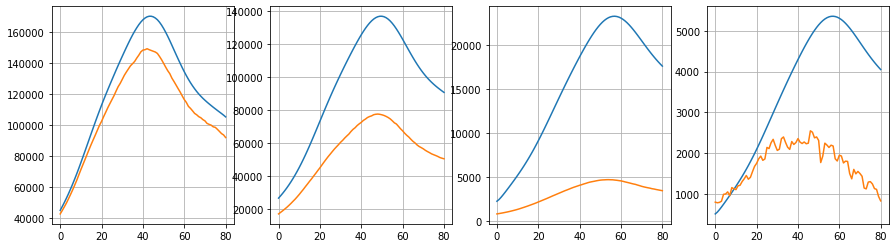

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8143727584344999, 'prob_severe': 0.1747136768242084, 'prob_hosp': 0.23021448064616196, 'prob_soujourn_inf_alpha': 3.4098987860634216, 'prob_soujourn_inf_beta': 0.605589121454815, 'prob_soujourn_symp_alpha': 1.6197894723929138, 'prob_soujourn_symp_beta': 0.21952147944950937} 

1889.1964600580359 loss at iteration  11 *** gradients_cummsum =  0.0028454347244624843
1835.9318013462696 loss at iteration  12 *** gradients_cummsum =  0.002600139376640335
1792.2971365971764 loss at iteration  13 *** gradients_cummsum =  0.002377453050544717
1756.5630578961488 loss at iteration  14 *** gradients_cummsum =  0.0021754866291502028
1727.3002310099655 loss at iteration  15 *** gradients_cummsum =  0.0019924766038839563


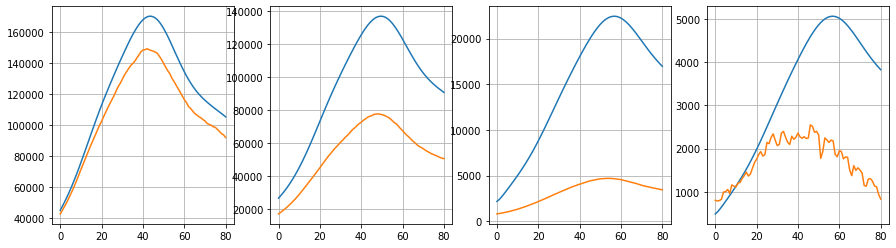

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.813186417712932, 'prob_severe': 0.168738415415186, 'prob_hosp': 0.2257063291479588, 'prob_soujourn_inf_alpha': 3.409834642316552, 'prob_soujourn_inf_beta': 0.6059429212124692, 'prob_soujourn_symp_alpha': 1.619650495859282, 'prob_soujourn_symp_beta': 0.22040867598365319} 

1703.3299334169806 loss at iteration  16 *** gradients_cummsum =  0.0018267817232507273
1683.682121322509 loss at iteration  17 *** gradients_cummsum =  0.0016768789643067461
1667.5600241657933 loss at iteration  18 *** gradients_cummsum =  0.001541358925688054
1654.310366263075 loss at iteration  19 *** gradients_cummsum =  0.0014189207544325778
1643.398412908251 loss at iteration  20 *** gradients_cummsum =  0.0013083667228574677


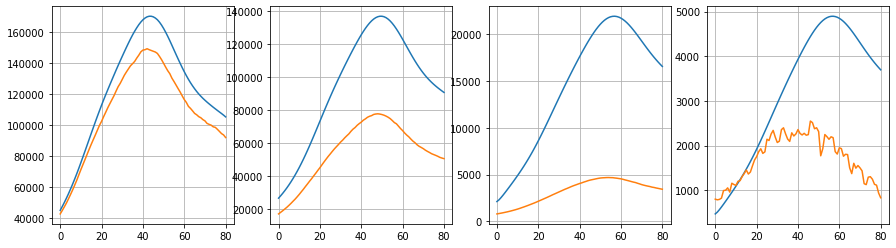

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8125166211642596, 'prob_severe': 0.16514241395955032, 'prob_hosp': 0.22302805877784368, 'prob_soujourn_inf_alpha': 3.4097662825591746, 'prob_soujourn_inf_beta': 0.6063149781125623, 'prob_soujourn_symp_alpha': 1.6195013037714647, 'prob_soujourn_symp_beta': 0.22133141583550406} 

1634.3871312018168 loss at iteration  21 *** gradients_cummsum =  0.0012085965687075174
1626.9198430180845 loss at iteration  22 *** gradients_cummsum =  0.0011186017039826628
1620.7058280487313 loss at iteration  23 *** gradients_cummsum =  0.001037459386645916
1615.5084082852993 loss at iteration  24 *** gradients_cummsum =  0.0009643269368382571
1611.1351114267811 loss at iteration  25 *** gradients_cummsum =  0.0008984360657431905


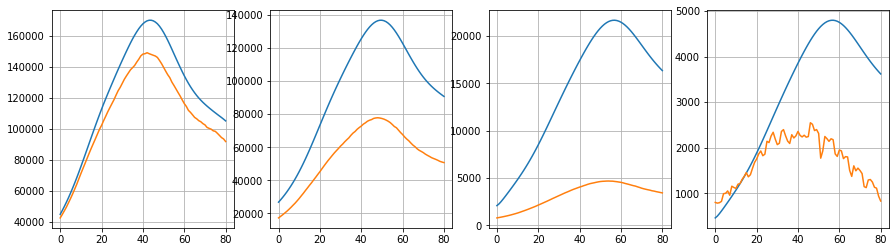

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8121488479242439, 'prob_severe': 0.1630020990648089, 'prob_hosp': 0.2214469017996016, 'prob_soujourn_inf_alpha': 3.4096955166888447, 'prob_soujourn_inf_beta': 0.6066972912133682, 'prob_soujourn_symp_alpha': 1.619346471512554, 'prob_soujourn_symp_beta': 0.22227161081149044} 

1607.4295695779597 loss at iteration  26 *** gradients_cummsum =  0.0008390873722696976
1604.2648614986015 loss at iteration  27 *** gradients_cummsum =  0.0007856450504009345
1601.5380519804376 loss at iteration  28 *** gradients_cummsum =  0.0007375318389365104
1599.165721172811 loss at iteration  29 *** gradients_cummsum =  0.0006942242355002676
1597.0803104089598 loss at iteration  30 *** gradients_cummsum =  0.0006552479883492445


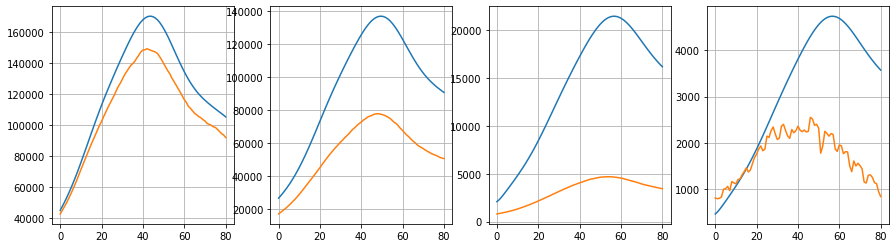

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8119571280019638, 'prob_severe': 0.16173509110378242, 'prob_hosp': 0.220515542261375, 'prob_soujourn_inf_alpha': 3.4096234103492216, 'prob_soujourn_inf_beta': 0.6070851454944658, 'prob_soujourn_symp_alpha': 1.619188678575342, 'prob_soujourn_symp_beta': 0.22321869439487546} 

1595.2271398826847 loss at iteration  31 *** gradients_cummsum =  0.0006201738723628624
1593.561977962581 loss at iteration  32 *** gradients_cummsum =  0.000588613749956955
1592.0490625559464 loss at iteration  33 *** gradients_cummsum =  0.0005602169128646242
1590.6594922571965 loss at iteration  34 *** gradients_cummsum =  0.0005346666974454938
1589.3699195008608 loss at iteration  35 *** gradients_cummsum =  0.0005116773631837717


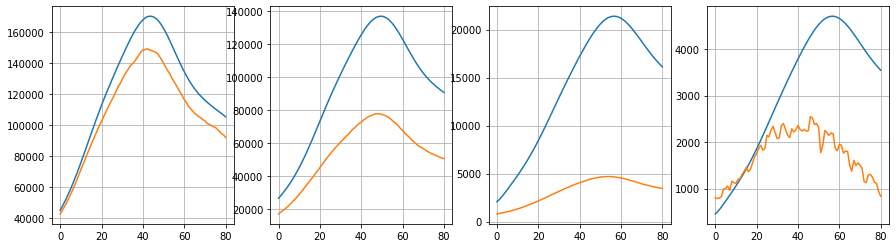

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8118677607459488, 'prob_severe': 0.1609854297120953, 'prob_hosp': 0.21996610537138578, 'prob_soujourn_inf_alpha': 3.4095505896830076, 'prob_soujourn_inf_beta': 0.6074757683942161, 'prob_soujourn_symp_alpha': 1.6190294905108902, 'prob_soujourn_symp_beta': 0.22416651644774685} 

1588.161490004757 loss at iteration  36 *** gradients_cummsum =  0.0004909912224415256
1587.0189828033442 loss at iteration  37 *** gradients_cummsum =  0.00047237600800949497
1585.9301134568573 loss at iteration  38 *** gradients_cummsum =  0.0004556224643828882
1584.8849698582565 loss at iteration  39 *** gradients_cummsum =  0.00044054214832674486
1583.8755556855363 loss at iteration  40 *** gradients_cummsum =  0.0004269654241895281


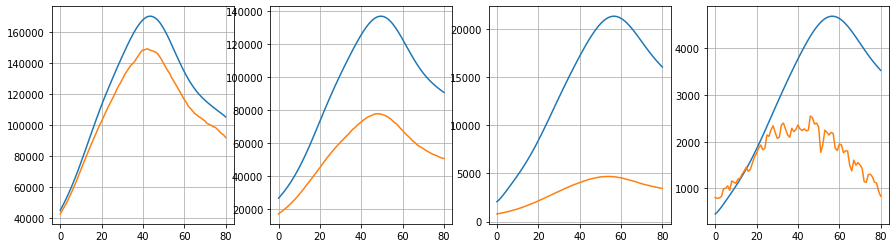

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8118377394220416, 'prob_severe': 0.16053985959185663, 'prob_hosp': 0.21964009833533935, 'prob_soujourn_inf_alpha': 3.4094774218253625, 'prob_soujourn_inf_beta': 0.6078675334627971, 'prob_soujourn_symp_alpha': 1.6188698190820083, 'prob_soujourn_symp_beta': 0.225111522818791} 

1582.8954211662897 loss at iteration  41 *** gradients_cummsum =  0.00041473963979154506
1581.9393646061453 loss at iteration  42 *** gradients_cummsum =  0.0004056625589968665
1581.003191228504 loss at iteration  43 *** gradients_cummsum =  0.000397663800567714
1580.0835184004782 loss at iteration  44 *** gradients_cummsum =  0.0003904421076379799
1579.1776183809538 loss at iteration  45 *** gradients_cummsum =  0.00038391843253228117


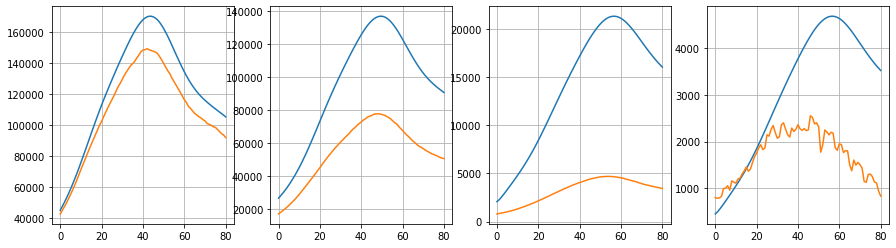

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8118420129634241, 'prob_severe': 0.1602721917720484, 'prob_hosp': 0.21944443577732323, 'prob_soujourn_inf_alpha': 3.4094041215915905, 'prob_soujourn_inf_beta': 0.6082594891152808, 'prob_soujourn_symp_alpha': 1.6187101929416243, 'prob_soujourn_symp_beta': 0.22605168430876924} 

1578.2832914046517 loss at iteration  46 *** gradients_cummsum =  0.0003780217057764082
1577.3987632808887 loss at iteration  47 *** gradients_cummsum =  0.00037268804524492026
1576.5226027943188 loss at iteration  48 *** gradients_cummsum =  0.0003678600409109336
1575.6536550948617 loss at iteration  49 *** gradients_cummsum =  0.00036348610853925787
1574.790987993679 loss at iteration  50 *** gradients_cummsum =  0.0003595199060738716


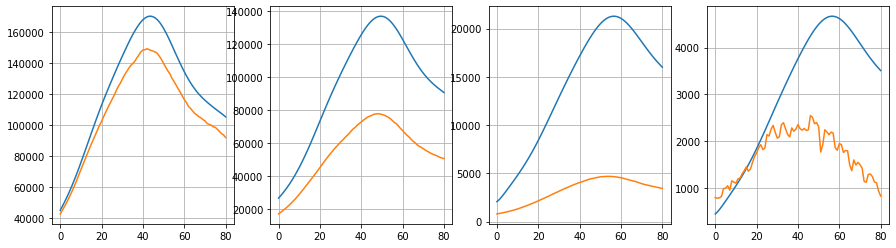

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8118660073085133, 'prob_severe': 0.16010831430905423, 'prob_hosp': 0.21932469019615997, 'prob_soujourn_inf_alpha': 3.4093308143672068, 'prob_soujourn_inf_beta': 0.6086510804890125, 'prob_soujourn_symp_alpha': 1.6185509165728282, 'prob_soujourn_symp_beta': 0.22698586628561496} 

1573.9338486733177 loss at iteration  51 *** gradients_cummsum =  0.00035591980704544805
1573.0816287990049 loss at iteration  52 *** gradients_cummsum =  0.0003526484256707593
1572.2338364052446 loss at iteration  53 *** gradients_cummsum =  0.00034967218883491524
1571.3900732455247 loss at iteration  54 *** gradients_cummsum =  0.0003469609504756801
1570.5500165459582 loss at iteration  55 *** gradients_cummsum =  0.00034448764437481065


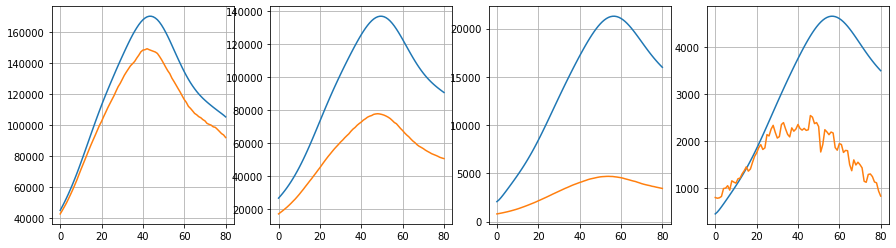

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8119012515378219, 'prob_severe': 0.1600048958179268, 'prob_hosp': 0.21924912280789494, 'prob_soujourn_inf_alpha': 3.4092575730955277, 'prob_soujourn_inf_beta': 0.6090419856443393, 'prob_soujourn_symp_alpha': 1.6183921634554292, 'prob_soujourn_symp_beta': 0.22791345791060993} 

1569.7134043084839 loss at iteration  56 *** gradients_cummsum =  0.0003422279715788899
1568.8800234744383 loss at iteration  57 *** gradients_cummsum =  0.00034016011918594225
1568.0497003928456 loss at iteration  58 *** gradients_cummsum =  0.00033826450732476164
1567.2222931453298 loss at iteration  59 *** gradients_cummsum =  0.00033652356166867547
1566.3976853666695 loss at iteration  60 *** gradients_cummsum =  0.0003349215088675504


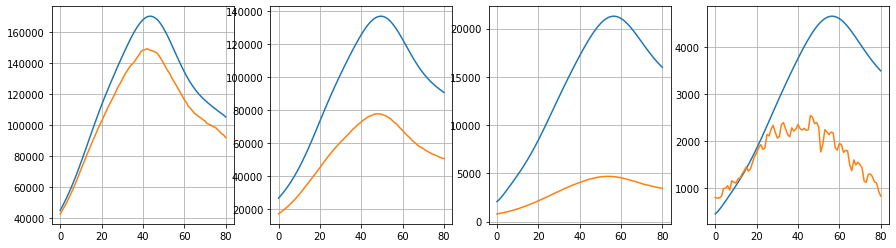

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8119428262005615, 'prob_severe': 0.1599366697992562, 'prob_hosp': 0.21919925561345946, 'prob_soujourn_inf_alpha': 3.4091844399949043, 'prob_soujourn_inf_beta': 0.6094320192636687, 'prob_soujourn_symp_alpha': 1.6182340306038292, 'prob_soujourn_symp_beta': 0.22883415426734424} 

1565.575781269811 loss at iteration  61 *** gradients_cummsum =  0.00033344419270370663
1564.7565016410263 loss at iteration  62 *** gradients_cummsum =  0.0003320789088434705
1563.9397806161105 loss at iteration  63 *** gradients_cummsum =  0.00033081425638800113
1563.1255630856058 loss at iteration  64 *** gradients_cummsum =  0.0003296400044921369
1562.3138026063086 loss at iteration  65 *** gradients_cummsum =  0.00032854697255852675


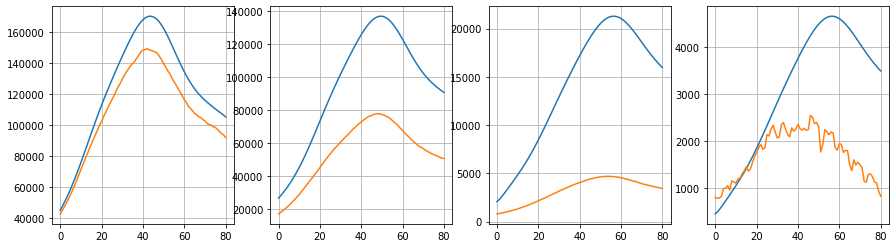

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8119878770272748, 'prob_severe': 0.1598889274774869, 'prob_hosp': 0.21916434176791, 'prob_soujourn_inf_alpha': 3.4091114392950983, 'prob_soujourn_inf_beta': 0.6098210761017897, 'prob_soujourn_symp_alpha': 1.618076570460354, 'prob_soujourn_symp_beta': 0.22974782846320477} 

1561.5044597204878 loss at iteration  66 *** gradients_cummsum =  0.0003275269226503955
1560.697500603206 loss at iteration  67 *** gradients_cummsum =  0.00032657246286308707
1559.8928959737914 loss at iteration  68 *** gradients_cummsum =  0.00032567696056749285
1559.0906202198935 loss at iteration  69 *** gradients_cummsum =  0.00032483446451228907
1558.290650692631 loss at iteration  70 *** gradients_cummsum =  0.0003240396349005666


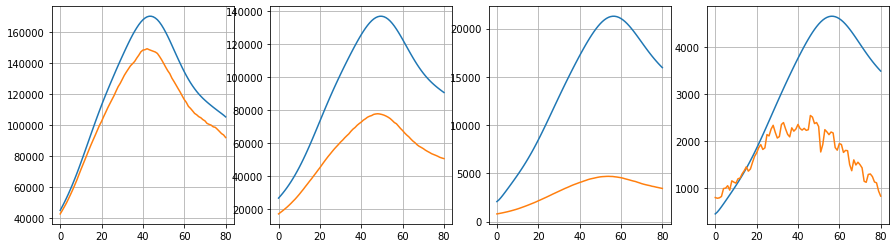

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8120347500614197, 'prob_severe': 0.15985311492586093, 'prob_hosp': 0.21913813495758308, 'prob_soujourn_inf_alpha': 3.4090385847005438, 'prob_soujourn_inf_beta': 0.6102090978074939, 'prob_soujourn_symp_alpha': 1.6179198095320786, 'prob_soujourn_symp_beta': 0.23065445662172468} 

1557.492967139464 loss at iteration  71 *** gradients_cummsum =  0.00032328768060874147
1556.6975512478184 loss at iteration  72 *** gradients_cummsum =  0.0003225743028497123
1555.90438627794 loss at iteration  73 *** gradients_cummsum =  0.00032189564458880144
1555.1134567674499 loss at iteration  74 *** gradients_cummsum =  0.0003212482451549415
1554.3247482936326 loss at iteration  75 *** gradients_cummsum =  0.0003206289995084972


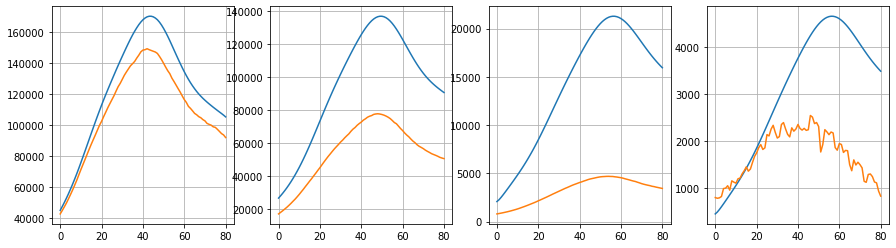

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8120824887152408, 'prob_severe': 0.1598242608900463, 'prob_hosp': 0.21911700631628392, 'prob_soujourn_inf_alpha': 3.408965883761033, 'prob_soujourn_inf_beta': 0.6105960534699817, 'prob_soujourn_symp_alpha': 1.617763759274481, 'prob_soujourn_symp_beta': 0.2315540739392965} 

1553.5382472821645 loss at iteration  76 *** gradients_cummsum =  0.0003200351216836705
1552.7539408532202 loss at iteration  77 *** gradients_cummsum =  0.00031946411198294255
1551.9718166976265 loss at iteration  78 *** gradients_cummsum =  0.0003189137275315903
1551.1918629771787 loss at iteration  79 *** gradients_cummsum =  0.0003183819558713822
1550.4140682444397 loss at iteration  80 *** gradients_cummsum =  0.00031786699126390547


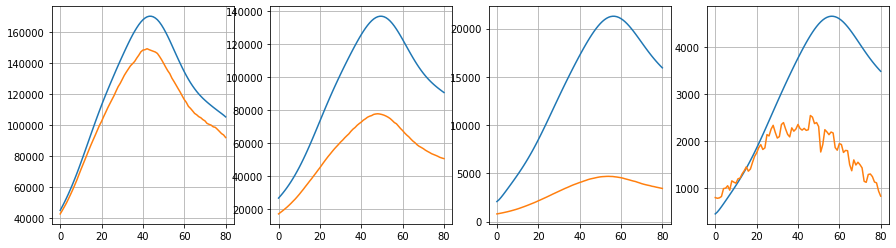

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8121305414201874, 'prob_severe': 0.15979947759910657, 'prob_hosp': 0.2190988483384703, 'prob_soujourn_inf_alpha': 3.4088933404301383, 'prob_soujourn_inf_beta': 0.6109819282183458, 'prob_soujourn_symp_alpha': 1.6176084224438108, 'prob_soujourn_symp_beta': 0.232446748972246} 

1549.6384213781387 loss at iteration  81 *** gradients_cummsum =  0.00031736721340743933
1548.864911531191 loss at iteration  82 *** gradients_cummsum =  0.0003168811683750425
1548.0935280888002 loss at iteration  83 *** gradients_cummsum =  0.0003164075514822713
1547.3242606347148 loss at iteration  84 *** gradients_cummsum =  0.0003159451919309053
1546.5570989240507 loss at iteration  85 *** gradients_cummsum =  0.0003154930390393809


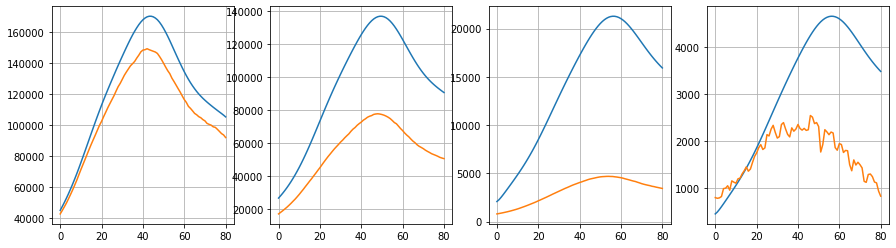

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8121785917436753, 'prob_severe': 0.15977708818928393, 'prob_hosp': 0.2190824374318441, 'prob_soujourn_inf_alpha': 3.4088209565622405, 'prob_soujourn_inf_beta': 0.6113667165432294, 'prob_soujourn_symp_alpha': 1.6174537968024825, 'prob_soujourn_symp_beta': 0.23333256861465895} 

1545.7920328613177 loss at iteration  86 *** gradients_cummsum =  0.00031505014986910436
1545.029052482685 loss at iteration  87 *** gradients_cummsum =  0.0003146156781306005
1544.2681479417465 loss at iteration  88 *** gradients_cummsum =  0.0003141888642503609
1543.5093094978388 loss at iteration  89 *** gradients_cummsum =  0.0003137690264229729
1542.7525275067337 loss at iteration  90 *** gradients_cummsum =  0.0003133555526308385


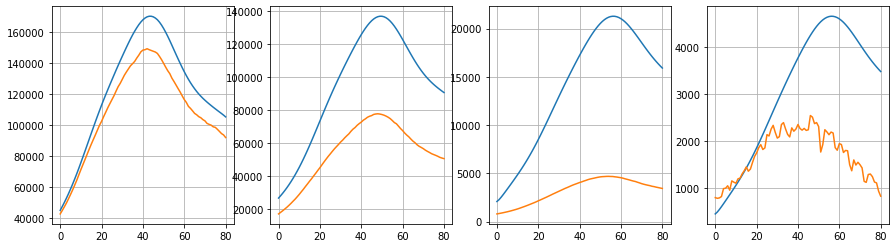

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8122264596946831, 'prob_severe': 0.1597561192763158, 'prob_hosp': 0.2190670634048973, 'prob_soujourn_inf_alpha': 3.4087487327882355, 'prob_soujourn_inf_beta': 0.6117504183860825, 'prob_soujourn_symp_alpha': 1.6172998772790281, 'prob_soujourn_symp_beta': 0.23421162934113648} 

1541.9977924129732 loss at iteration  91 *** gradients_cummsum =  0.0003129478934288476
1541.2450947436948 loss at iteration  92 *** gradients_cummsum =  0.000312545555531184
1540.494425103563 loss at iteration  93 *** gradients_cummsum =  0.00031214809600141764
1539.7457741706287 loss at iteration  94 *** gradients_cummsum =  0.00031175511709821235
1538.9991326929203 loss at iteration  95 *** gradients_cummsum =  0.0003113662615917333


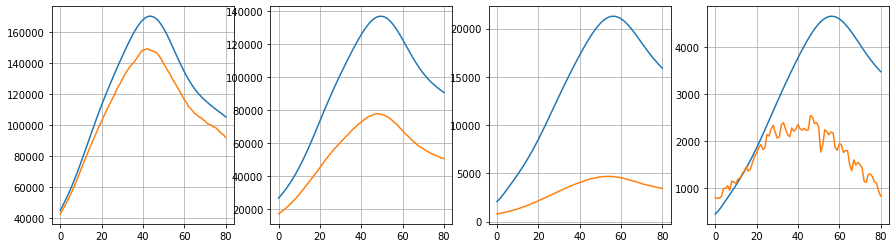

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8122740443990352, 'prob_severe': 0.15973600603587304, 'prob_hosp': 0.21905231418950097, 'prob_soujourn_inf_alpha': 3.4086766690276504, 'prob_soujourn_inf_beta': 0.6121330368497852, 'prob_soujourn_symp_alpha': 1.617146657225971, 'prob_soujourn_symp_beta': 0.2350840321182907} 

1538.2544914856237 loss at iteration  96 *** gradients_cummsum =  0.000310981208619371
1537.5118414287551 loss at iteration  97 *** gradients_cummsum =  0.0003105996699216837
1536.7711734652075 loss at iteration  98 *** gradients_cummsum =  0.00031022138649638596
1536.0324785990802 loss at iteration  99 *** gradients_cummsum =  0.0003098461255832606


In [3]:
def get_truthdict_given_mid_end(mid_date,end_date):
#     print(mid_date,end_date, 'mid date end date')
    pd_truthful.start_date = mid_date
    pd_truthful.end_date = end_date
    hd_truthful.start_date = mid_date
    hd_truthful.end_date = end_date
    truthdict = {
    'date':pd_truthful.filtered_data['date'],
    'infections':pd_truthful.filtered_data['infections'],
    'symptomatic':pd_truthful.filtered_data['symptomatic'],
    'severe':pd_truthful.filtered_data['severe'],
    'hosp':hd_truthful.filtered_data['previous_day_admission_adult_covid_confirmed'],
    }

    return truthdict


def add_to_dict(d,g):
    for k in d.keys():
        d[k]=d[k]+g[k]
    return d

def scale_dict_vals(d,s):
    for k in d.keys():
        d[k] = s*d[k]
    return d

def cumsum_dict_vals(d,s):
    cumsum= 0
    for k in d.keys():
        cumsum+=abs(s*d[k])
    return cumsum

import numpy as np
import numpy.random as random
def gradient_descent(pd_list_train, init_params, n_iters=2, step_size=0.001, n_steps_between_print=5, lambda_reg = 1, epsilon_stop=5e-10):
    batch_loss_per_iteration = []
    val_loss_per_iteration = []
    for n in range(n_iters):
        
        batch_loss = 0
        for pd in pd_list_train:
            pd.loss_per_iteration += [0]
        
        #         pd_batch = random.choice(pd_list_train,replace=False, size=3)
        pd_batch = random.choice(pd_list_train,replace=False, size=1)
        if n == 0:
            new_params = init_params
        else:
            new_params = add_to_dict(new_params, scale_dict_vals(grads, -1*step_size))
        
        
        for i,pd in enumerate(pd_batch):
            pd.training_mode=True
            new_grad = pd.get_grad_of_loss(new_params,get_truthdict_given_mid_end(pd.filtered_data['date'][-1], pd.end_date) ,lambda_reg= lambda_reg)
            batch_loss += pd.loss_per_iteration[-1] # pd.loss_per_iteration[-1] is set to loss within get_grad_of_loss call
            if i == 0:
                grads = new_grad
            else:
                grads = add_to_dict(grads, new_grad)
        
        grads = scale_dict_vals(grads, 1/len(pd_batch))
        batch_loss_per_iteration += [batch_loss/len(pd_batch)]
        print(batch_loss/len(pd_batch), 'loss at iteration ', n, '*** gradients_cummsum = ', cumsum_dict_vals(grads, step_size))
#         print(cumsum_dict_vals(grads,1), 'cumsum for ', grads)
        
#         pd_list_val = pd_batch # DEBUG PURPOSES
        
        val_loss_per_iteration += [np.nan]
        if n%n_steps_between_print == 0:
            val_loss = 0              
            for pd in pd_list_val:
                fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4,figsize=(15,4))    
                pd.training_mode=False
                fc_data = pd.get_forecasted_data(new_params) 
                pd.training_mode=True
                truth_data = get_truthdict_given_mid_end(pd.filtered_data['date'][-1],pd.end_date)
                
                ax1.plot(fc_data['infections'])
                ax2.plot(fc_data['symptomatic'])
                ax3.plot(fc_data['severe'])
                ax4.plot(fc_data['hosp'])

                ax1.plot(truth_data['infections'])
                ax2.plot(truth_data['symptomatic'])
                ax3.plot(truth_data['severe'])
                ax4.plot(truth_data['hosp'])
                for i in range(1,5,1):
                    eval('ax' + str(i) + '.grid()') 
                plt.show()
                print('new_params = ',new_params,'\n')
                loss = 0
                for i,k in enumerate(['symptomatic', 'severe','hosp']):
                    val_loss+=np.sum(np.abs(np.array(fc_data[k]) - np.array(truth_data[k]))*np.linspace(0.1, 1, num=len(fc_data[k])) )*(i+1)
            val_loss_per_iteration[-1] = val_loss/len(pd_list_val)
        
        if cumsum_dict_vals(grads, step_size)<epsilon_stop:
            return new_params, batch_loss_per_iteration, val_loss_per_iteration
    return new_params, batch_loss_per_iteration, val_loss_per_iteration

train_params = {'T_serial':5.8,'prob_sympt':0.82,'prob_severe':0.2,'prob_hosp':0.25,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
new_params, batch_loss_per_iteration, val_loss_per_iteration = gradient_descent(
    pd_list_train, train_params, n_iters=100, step_size=5e-8, n_steps_between_print=5, lambda_reg=1,epsilon_stop=1e-4)



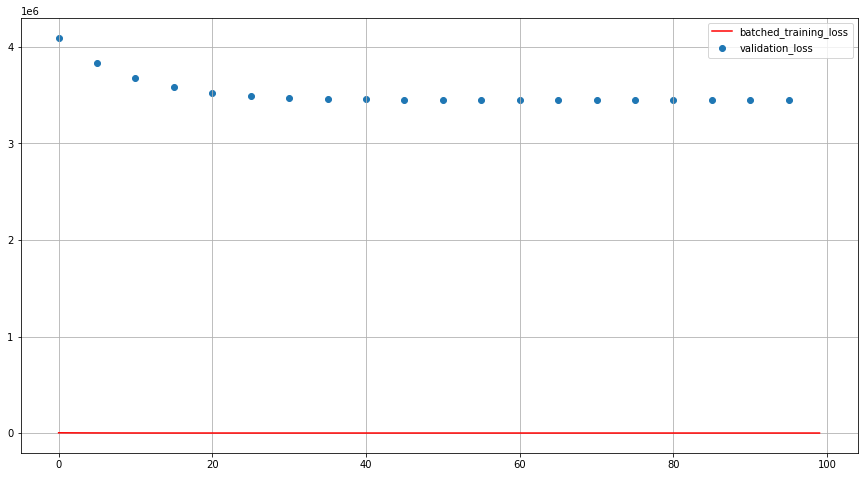

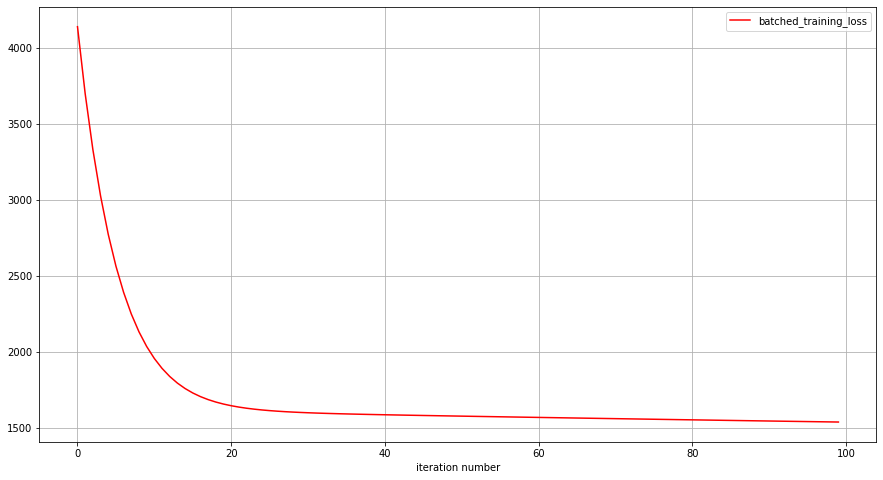

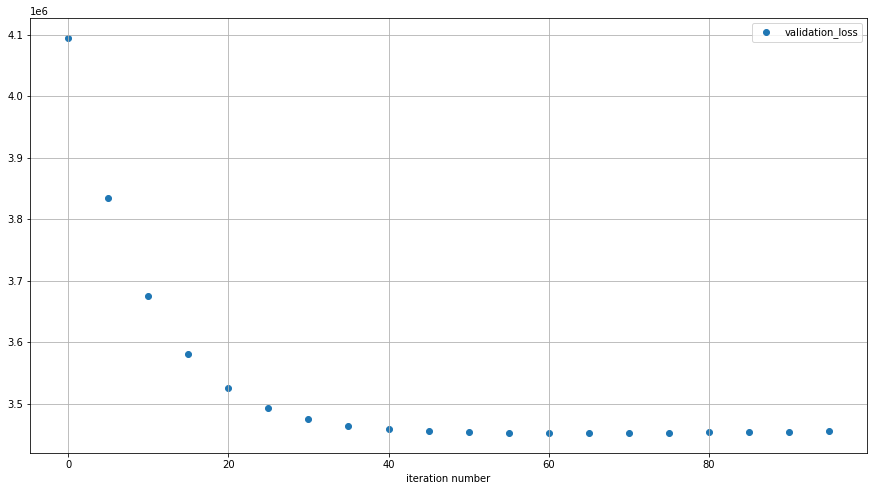

In [4]:
fig = plt.figure(figsize=(15,8))
plt.plot(batch_loss_per_iteration,color='r', label='batched_training_loss')
# plt.show()

plt.scatter(list(range(len(val_loss_per_iteration))),val_loss_per_iteration,label='validation_loss')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure(figsize=(15,8))
plt.plot(batch_loss_per_iteration,color='r', label='batched_training_loss')
plt.legend()
plt.grid()
plt.xlabel('iteration number')
plt.show()

fig = plt.figure(figsize=(15,8))
plt.scatter(list(range(len(val_loss_per_iteration))),val_loss_per_iteration,label='validation_loss')
plt.legend()
plt.grid()
plt.xlabel('iteration number')
plt.show()

# print(val_loss_per_iteration)
# import numpy as np
# np.linspace(1, 10, num=10) * np.array(np.linspace(0.1, 1, num=10))


{'T_serial': 5.8, 'prob_sympt': 0.82, 'prob_severe': 0.2, 'prob_hosp': 0.25, 'prob_soujourn_inf_alpha': 3.41, 'prob_soujourn_inf_beta': 0.605, 'prob_soujourn_symp_alpha': 1.62, 'prob_soujourn_symp_beta': 0.218}
20200801  to  20210225
cyan = forecasts after being trained on that interval
violet = forecasts on validation/unseen interval


<ipython-input-5-e205c186d35b>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['']+ date_labels)


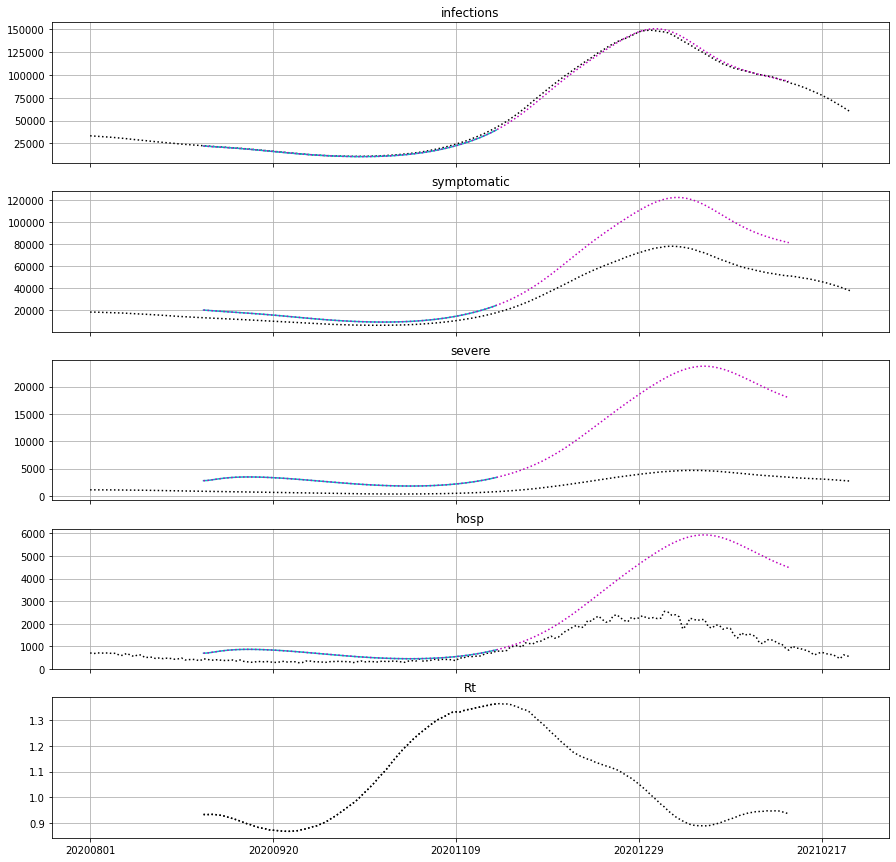

{'T_serial': 5.8, 'prob_sympt': 0.8123118702355172, 'prob_severe': 0.15972030619275998, 'prob_hosp': 0.21904080029791448, 'prob_soujourn_inf_alpha': 3.408619132906883, 'prob_soujourn_inf_beta': 0.612438354857725, 'prob_soujourn_symp_alpha': 1.6170245797841143, 'prob_soujourn_symp_beta': 0.23577722950317476}
20200801  to  20210225
cyan = forecasts after being trained on that interval
violet = forecasts on validation/unseen interval


<ipython-input-5-e205c186d35b>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['']+ date_labels)


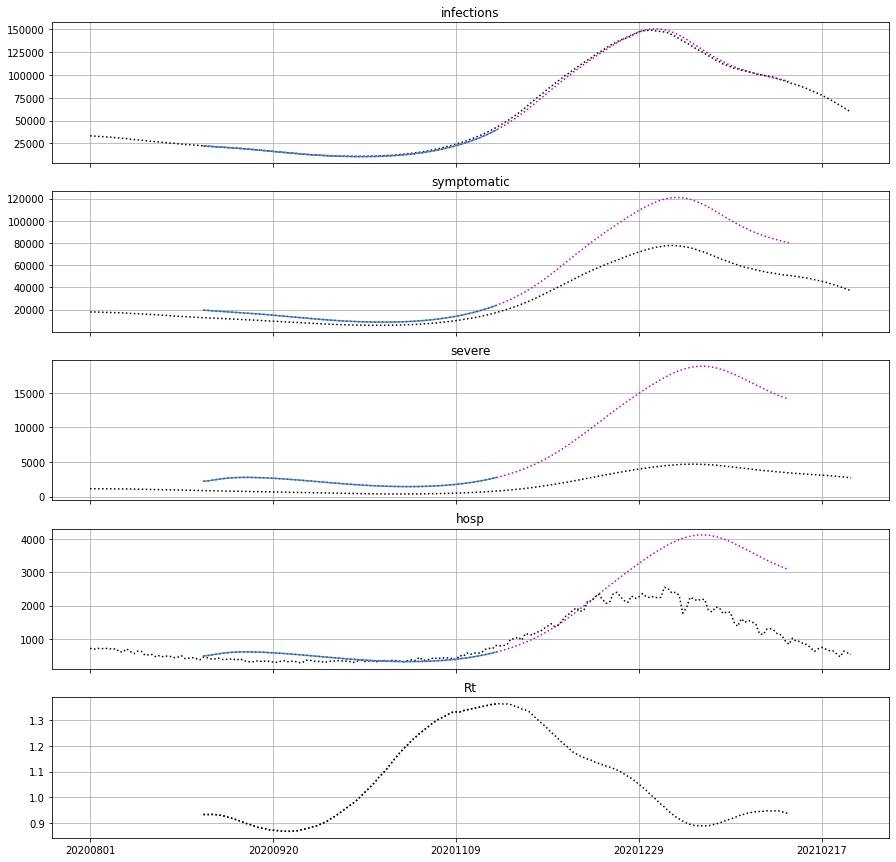

In [5]:
def plot_performance(new_params):
    color_list = ['k','k','k','k','k']
    fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=5, ncols=1,figsize=(15,15), sharex=True)   
    truth_data = get_truthdict_given_mid_end('20200801', '20210225')
    print(pd_truthful.start_date, ' to ', pd_truthful.end_date)
    print('cyan = forecasts after being trained on that interval')
    print('violet = forecasts on validation/unseen interval')


    for i,(p,c) in enumerate(zip(['infections', 'symptomatic', 'severe','hosp','Rt'],color_list)):
        if p != 'Rt':
            eval('ax'+str(i+1) + ".plot( truth_data[p], color = c,ls=':' )")
                            
        for pd in pd_list_train:
            pd.training_mode = False
            fc_data = pd.get_forecasted_data(new_params) 
    #         '-', '--', '-.', ':',
            start_idx = list(truth_data['date']).index(int(fc_data['date'][0]))
            end_idx = list(truth_data['date']).index(int(fc_data['date'][-1]))
            if p != 'Rt':
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'c',ls = '-' )")
            else:
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'k',ls = ':' )")

        #         for pd in pd_list_val:
        for pd in pd_list_train:
            pd.training_mode = False
            end_date_original = pd.end_date
            pd.end_date = str((datetime.datetime.strptime(str(end_date_original),'%Y%m%d') + datetime.timedelta(days = forecast_duration)).strftime('%Y%m%d'))
            fc_data = pd.get_forecasted_data(new_params) 
    #         '-', '--', '-.', ':',
            start_idx = list(truth_data['date']).index(int(fc_data['date'][0]))
            end_idx = list(truth_data['date']).index(int(fc_data['date'][-1]))
            if p != 'Rt':
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'm',ls = ':' )")
            else:
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'k',ls = ':' )")
            
            pd.end_date = end_date_original
        eval('ax'+str(i+1) + '.set_title(p)')
        eval('ax'+str(i+1) + '.grid()')
    # current_labels = ax4.get_xticklabels()

    #     eval('ax'+str(i+1) + ".set_xticklabels( [str(d) for d in list(truth_data['date']) ] )" )
    current_labels = ax4.get_xticks();
    date_labels = [truth_data['date'][int(jj)] for jj in list(current_labels[1:-1]) ]

    ax4.set_xticklabels(['']+ date_labels)

# train_params = {'T_serial':5.8,'prob_sympt':0.536,'prob_severe':0.1,'prob_hosp':0.55,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
train_params = {'T_serial':5.8,'prob_sympt':0.82,'prob_severe':0.2,'prob_hosp':0.25,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
print(train_params)
plot_performance(train_params)
plt.show()

print(new_params)
plot_performance(new_params)


In [6]:
import pickle


filename = state_short + '_population_params'
with open(filename+'.pickle', 'wb') as handle:
    pickle.dump(new_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(filename+'.pickle', 'rb') as handle:
    b = pickle.load(handle)

print (new_params == b)
print(new_params)

True
{'T_serial': 5.8, 'prob_sympt': 0.8123118702355172, 'prob_severe': 0.15972030619275998, 'prob_hosp': 0.21904080029791448, 'prob_soujourn_inf_alpha': 3.408619132906883, 'prob_soujourn_inf_beta': 0.612438354857725, 'prob_soujourn_symp_alpha': 1.6170245797841143, 'prob_soujourn_symp_beta': 0.23577722950317476}


In [7]:
a = [1.0414056867126864, 1.045738718947992, 1.049645937203434, 1.0531059433204188, 1.056099491017124, 1.0586077984700395, 1.0606129085859002, 1.0621144550079618, 1.0631391597380282, 1.0637168201424787, 1.063877921158446, 1.0636535117270811, 1.063075563823081, 1.06217745016898, 1.0609929123049715, 1.0595558191340837, 1.0579000814535389, 1.0560635045480908, 1.0540966198222228, 1.0520522917059605, 1.0499830180479908, 1.0479409004424465, 1.045978592380756, 1.0441530075662602, 1.0425221082614338, 1.0411435675900995, 1.040074888234737, 1.0393691172058153, 1.0390466940571577, 1.0391137172452158, 1.039576616296324, 1.0404422435941652, 1.0417151035108625, 1.043367617528996, 1.0453513908275955, 1.0476176105202242, 1.050117251545854, 1.0528009994459115, 1.0556199553137935, 1.058525503985993, 1.061468527210398, 1.0643993499081252, 1.0672682325757905, 1.0700441715472546, 1.0727209556155135, 1.075294023857072, 1.077758805837276, 1.0801107800866736, 1.082351015904942, 1.0844910249235518, 1.0865435733185682, 1.0885215467526603, 1.0904379357652982, 1.092303914057905, 1.0941255593090653, 1.095908121436799, 1.0976568782506102, 1.0993771324101034, 1.1010797468389129, 1.1027978244713814, 1.1045702094360983, 1.1064359715055287, 1.1084344246441702, 1.1106053773719848, 1.1129902740634583, 1.115631440340607, 1.118571675900468, 1.121854344747914, 1.125515915207308, 1.1295236423344377, 1.1338066760990442, 1.1382927981293978, 1.1429086303813023, 1.1475755041745832, 1.1521529036480076, 1.1564512890668055, 1.1602772068277076, 1.163435138901248, 1.1657299638741223, 1.1670065175068989, 1.167154848979851, 1.1660704093725531, 1.163652979488092, 1.159809352532886, 1.1545425852387183, 1.1479995705319073, 1.140341058787823, 1.131728052671144, 1.1223205737456752, 1.1123071808559624, 1.1019401565832945, 1.0914729421328588, 1.081150056253023, 1.0712070408362164, 1.061847784976684, 1.0531941146572743, 1.0453492526820096, 1.0384143761064648, 1.032489467307816, 1.0276499743747416, 1.0238541965095556, 1.0210277442394735, 1.0190994812047691, 1.01800093520834, 1.0176573398112794, 1.0179333303145317, 1.0186665777330592, 1.0196947701808097, 1.0208551991566466, 1.0219867194175, 1.02295360248508, 1.0236365714492646, 1.023916596900608, 1.0236750632096892, 1.0227978283931451, 1.0212410268339005, 1.0190253690825244, 1.0161752927307537, 1.0127164854346895, 1.0086766838097756, 1.0041212147765222, 0.9991628134634488, 0.9939160363827212, 0.9884936138734632, 0.9830059938064204, 0.9775463380575976, 0.9721781383026686, 0.9669604762716856, 0.9619511197435796, 0.95720657034414, 0.9527613989368624, 0.9485936804307058, 0.9446726336726567, 0.9409680142577732, 0.9374500565236534, 0.9340889047427764, 0.9308530276654378, 0.9277107722459847, 0.924630863484423, 0.9215823903179052, 0.9185405139072842, 0.9155147977966708, 0.9125272434749367, 0.9095995344115916, 0.9067530205400042, 0.9040103969246914, 0.9014093375500692, 0.8989952714155099, 0.8968132134977301, 0.8949077829042015, 0.8933221994103172, 0.8920827380400209, 0.891202847405115, 0.8906958981120509, 0.8905755795581267, 0.8908552643442027, 0.8915298102087126, 0.8925737914192805, 0.8939610211040494, 0.8956655028377412, 0.8976614459752816, 0.8999292478855966, 0.9024589050739432, 0.9052413215671404, 0.9082674663237208, 0.9115284082799748, 0.9150278123875828, 0.9187977191553024, 0.9228746915592012, 0.9272961491029412, 0.9321004850553548, 0.9373234368111, 0.9429894962096708, 0.9491215938825914, 0.9557436824024744, 0.96288082768806, 0.9705501375656792, 0.97872452840575, 0.9873624660247766, 0.9964211910928132, 1.0058565038345315, 1.015620053563779, 1.0256428364443009, 1.0358445369745428, 1.046141466838842, 1.0564464921698702, 1.0666704588597395, 1.0767380211971422, 1.0865823753324495, 1.0961347768198682, 1.1053245154972045, 1.1140804879459645, 1.1223574045462503, 1.1301347244411708, 1.1373932262911448, 1.1441141590258237, 1.1502796942948947, 1.1558877892634722, 1.160957138010133, 1.1655089876100169, 1.1695657175947505, 1.1731509153666506, 1.1763086304887171, 1.1791202575445898, 1.1816722563984925, 1.1840519831200709, 1.186347550986801, 1.18867933009106, 1.1912540726691014, 1.1942944521843917, 1.1980254038130191, 1.2026750682766325]
print(len(a))

212
